https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('penguins_size.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


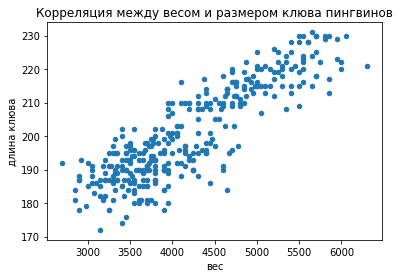

In [ ]:
df.plot(kind='scatter',
        x='body_mass_g',
        y='flipper_length_mm',
        xlabel='вес',
        ylabel='длина клюва',
        title='Корреляция между весом и размером клюва пингвинов')
# Вывод: есть прмая связь между весом и размером клюва пингвинов,
# чем больше вес, тем крупнее особь и тем больше у неё клюв.

Text(0, 0.5, 'вес')

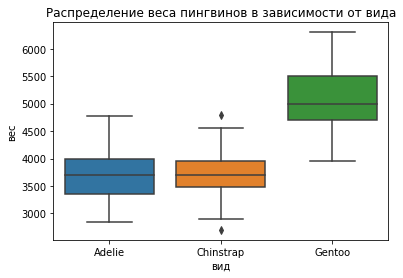

In [ ]:
sns.boxplot(x=df['species'], y=df['body_mass_g']).set_title('Распределение веса пингвинов в зависимости от вида')
plt.xlabel('вид')
plt.ylabel('вес')
# Вывод: Мы видим, что пингвины Gentoo самые крупные,
# а Adelie и Chinstrap примерно одинаковые по размеру,
# но Chinstrap всё таки немного меньше.

In [ ]:
df.sex.unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

Text(0, 0.5, 'число особей')

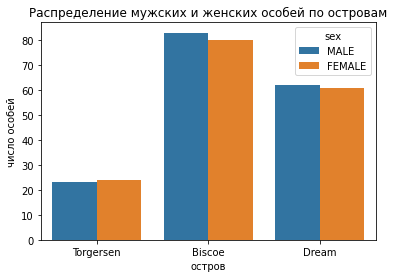

In [ ]:
sns.countplot(x = 'island', hue = 'sex', data = df.loc[df['sex'] != '.'])
plt.title('Распределение мужских и женских особей по островам')
plt.xlabel('остров')
plt.ylabel('число особей')
# Вывод: Можно предположить, что чем больше пингвинов на острове, тем большей площади этот остров.

In [ ]:
df_s_m = df.loc[df['sex'] == 'MALE'][['species', 'body_mass_g']].groupby('species').mean()
df_s_m

,body_mass_g
species,
Adelie,4043.493151
Chinstrap,3938.970588
Gentoo,5484.836066


In [ ]:
df_s_f = df.loc[df['sex'] == 'FEMALE'][['species', 'body_mass_g']].groupby('species').mean()
df_s_f

,body_mass_g
species,
Adelie,3368.835616
Chinstrap,3527.205882
Gentoo,4679.741379


Text(0, 0.5, 'средний вес')

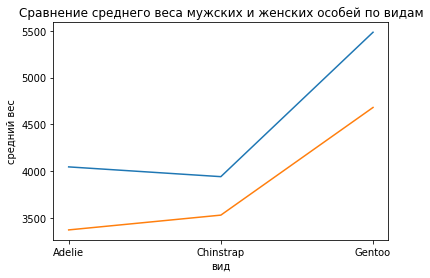

In [ ]:
plt.plot(df_s_m.index, df_s_m['body_mass_g'])
plt.plot(df_s_f.index, df_s_f['body_mass_g'])
plt.title('Сравнение среднего веса мужских и женских особей по видам')
plt.xlabel('вид')
plt.ylabel('средний вес')
# Вывод: средний вес мужских особей выше среднего веса женских особей во всех видах изученных пингвинов